In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [49]:
df=pd.read_csv('New Dataset/result.csv')
df.head()

,Y,X,data_payload_id,instance_datetime,url,agency,platform_type,platform_id,platform_name,gaw_id,...,daily_utc_begin,daily_utc_end,daily_utc_mean,daily_nobs,daily_mmu,daily_columnso2,latest_observation,country,scientific_authority,version
0,43.781,-79.468,2260781,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,15.3,19.2,17.0,14.0,2.7,-3.5,0,CAN,Vitali Fioletov,4.15
1,43.781,-79.468,2260785,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,16.1,19.5,17.4,12.0,2.7,-3.0,0,CAN,Vitali Fioletov,4.15
2,43.781,-79.468,2260788,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,15.6,19.3,17.4,22.0,2.7,-6.7,0,CAN,Vitali Fioletov,4.15
3,43.781,-79.468,2260764,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,14.9,18.3,16.3,7.0,2.9,-0.9,0,CAN,Vitali Fioletov,4.15
4,43.781,-79.468,2260775,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,15.0,18.9,17.7,15.0,2.7,-3.3,0,CAN,Vitali Fioletov,4.15


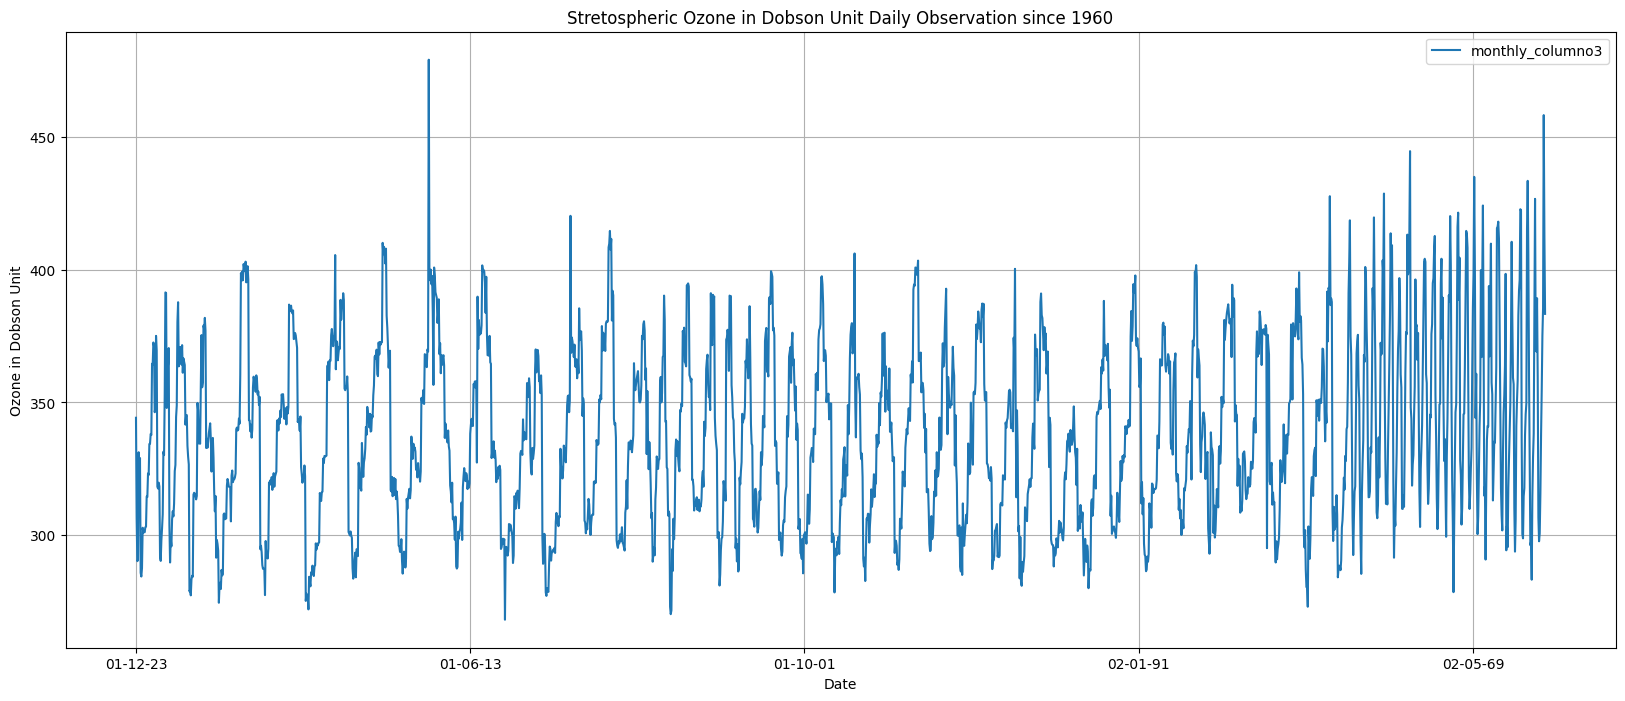

In [4]:
df_montly=df.copy()
df_montly=df_montly.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
        'monthly_stddevo3', 'monthly_npts','daily_date','daily_columno3',
        'daily_wlcode', 'daily_obscode', 
       'daily_stddevo3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)
df_montly.head()
df_montly = df_montly.drop_duplicates()
df_montly = df_montly.set_index('monthly_date')

df_montly.plot(figsize=(20,8))
plt.title("Stretospheric Ozone in Dobson Unit Daily Observation since 1960")
plt.xlabel("Date")
plt.ylabel('Ozone in Dobson Unit')
plt.grid()


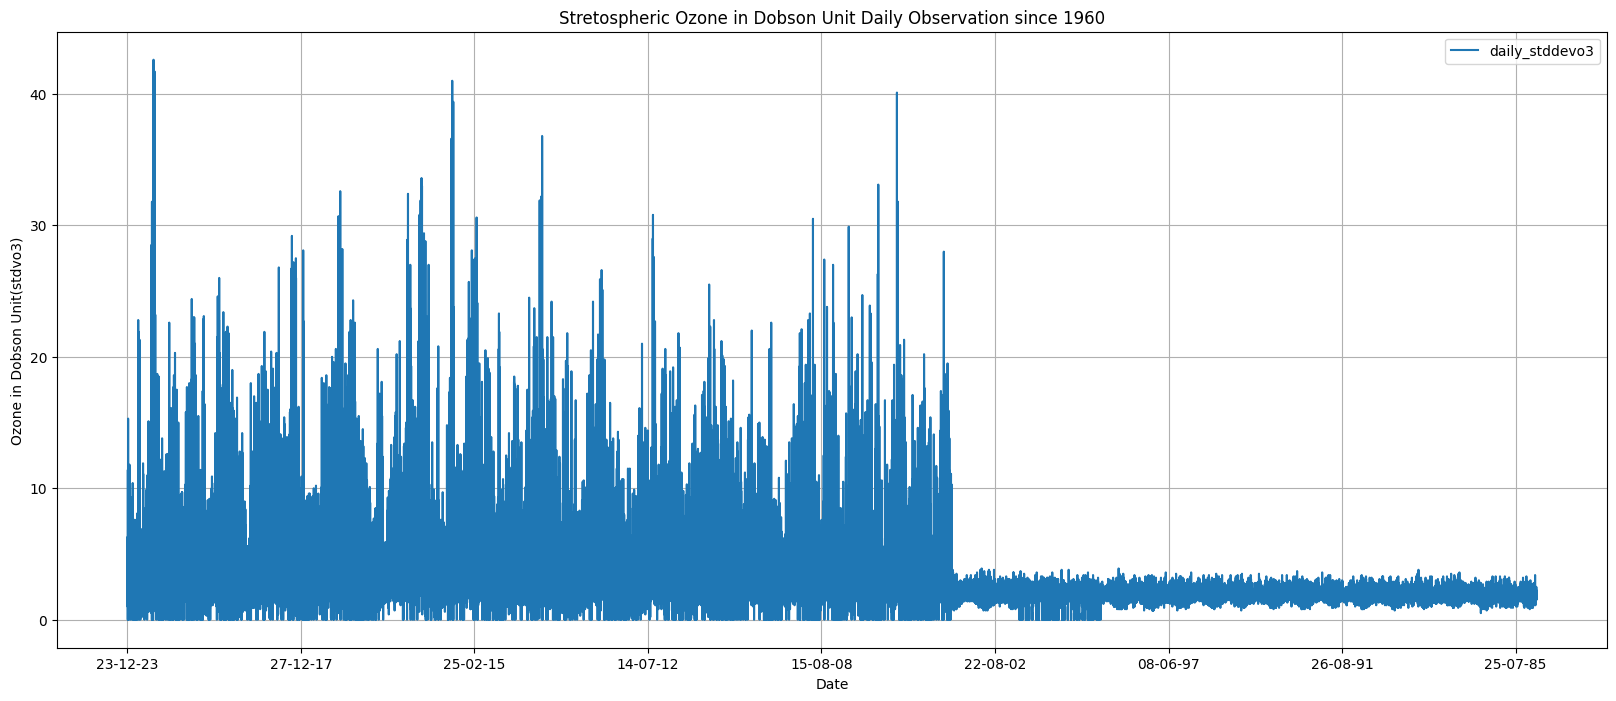

In [50]:
df_stdvo3 = df.copy()
df_stdvo3 = df_stdvo3.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
       'monthly_date', 'monthly_stddevo3', 'monthly_npts',
        'daily_wlcode', 'daily_obscode', 'monthly_columno3',
       'daily_columno3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)
df_stdvo3 = df_stdvo3.drop_duplicates()
df_stdvo3 = df_stdvo3.dropna()
df_stdvo3 = df_stdvo3.set_index('daily_date')

df_stdvo3.plot(figsize=(20,8))
plt.title("Stretospheric Ozone in Dobson Unit Daily Observation since 1960")
plt.xlabel("Date")
plt.ylabel('Ozone in Dobson Unit(stdvo3)')
plt.grid()
plt.show()

In [51]:
df=df.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
       'monthly_date', 'monthly_stddevo3', 'monthly_npts','daily_columno3',
        'daily_wlcode', 'daily_obscode', 'monthly_columno3',
        'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)
df.head()

,daily_date,daily_stddevo3
0,23-12-23,6.0
1,27-12-23,4.9
2,30-12-23,4.3
3,06-12-23,2.5
4,17-12-23,2.8


In [34]:
print(f"Date Range: {df.loc[:,'daily_date'][len(df)-1]} to {df.loc[:,'daily_date'][0]}")

Date Range: 08-01-60 to 23-12-23


In [35]:
df=df.drop_duplicates()
df=df.dropna()
# df=df.set_index('daily_date')
df.head()


,daily_date,daily_columno3
0,23-12-23,371.0
1,27-12-23,365.7
2,30-12-23,391.7
3,06-12-23,379.8
4,17-12-23,336.0


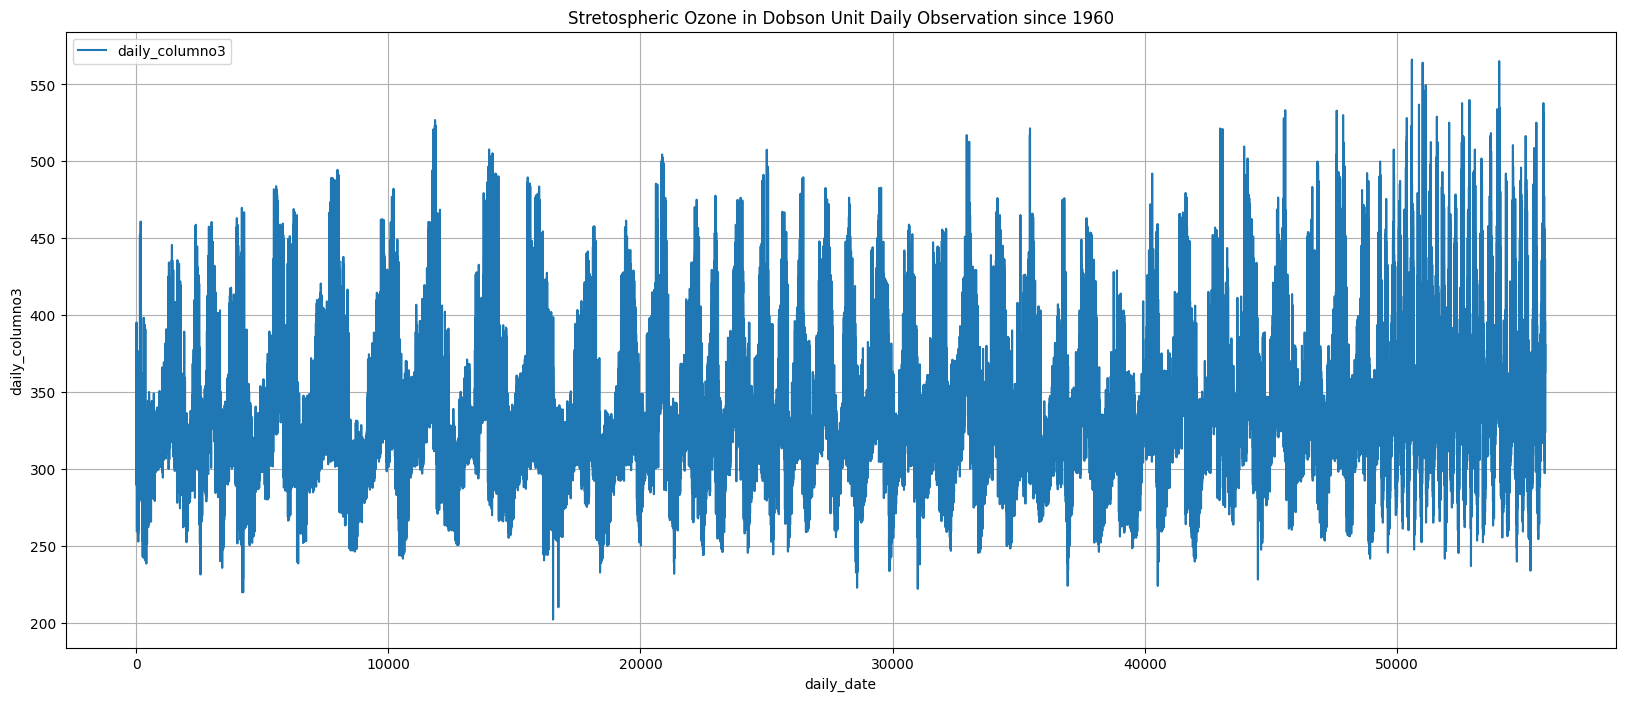

In [9]:
df.plot(figsize=(20,8))
plt.title("Stretospheric Ozone in Dobson Unit Daily Observation since 1960")
plt.xlabel("daily_date")
plt.ylabel('daily_columno3')
plt.grid()


In [10]:
round(df.describe(), 3)

,daily_columno3
count,54063.000
mean,337.449
std,44.110
min,202.000
25%,306.000
50%,330.700
75%,363.400
max,566.100


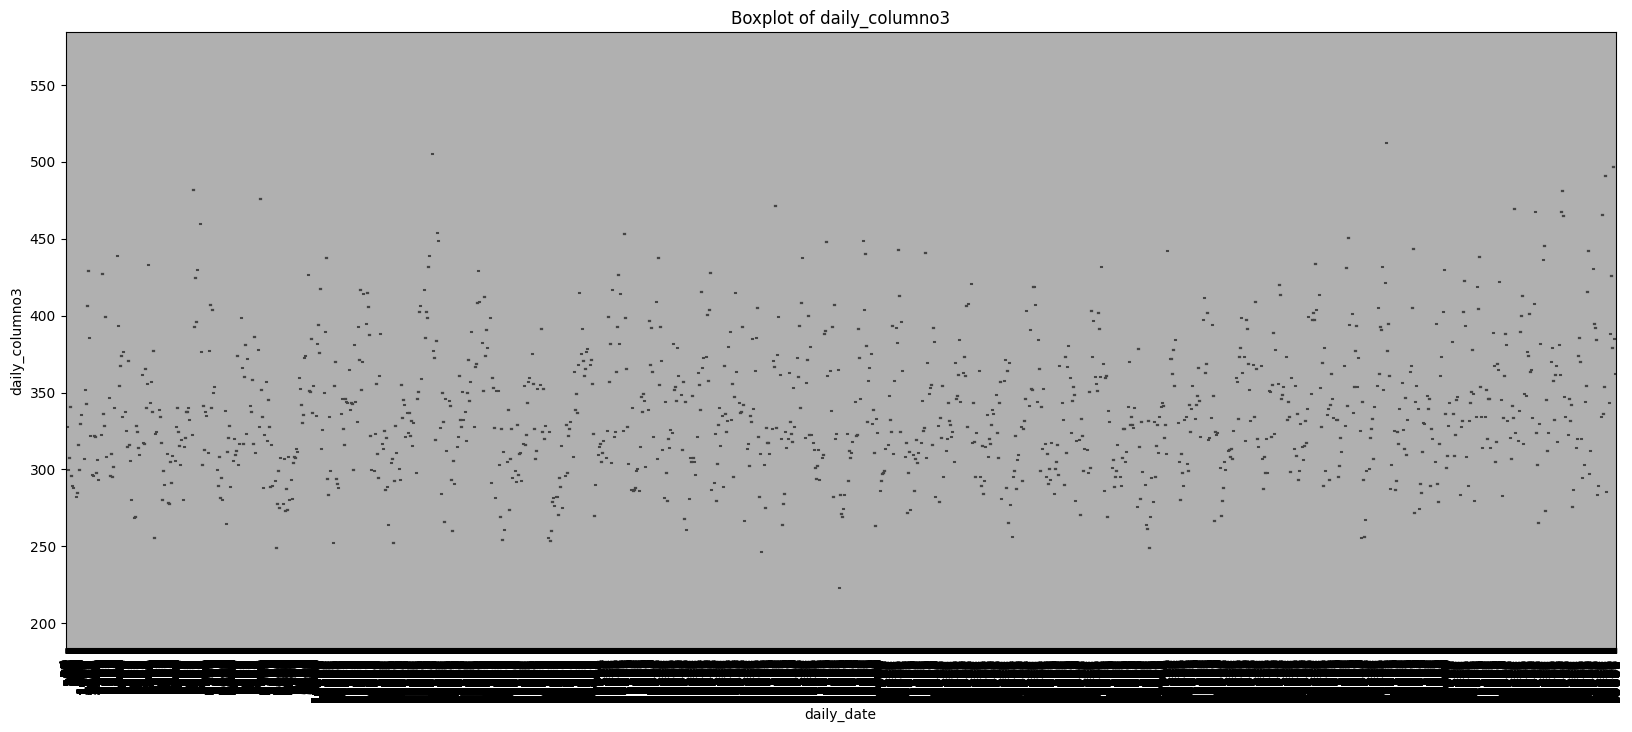

In [11]:
_,ax=plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index,y='daily_columno3',data=df,ax=ax)
ax.set_title("Boxplot of daily_columno3")
plt.xlabel("daily_date")
plt.ylabel('daily_columno3')
plt.xticks(rotation=90)
plt.grid()

In [12]:
df.head()
df.dtypes

daily_date         object
daily_columno3    float64
dtype: object

c:\Users\Abir Hossain\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


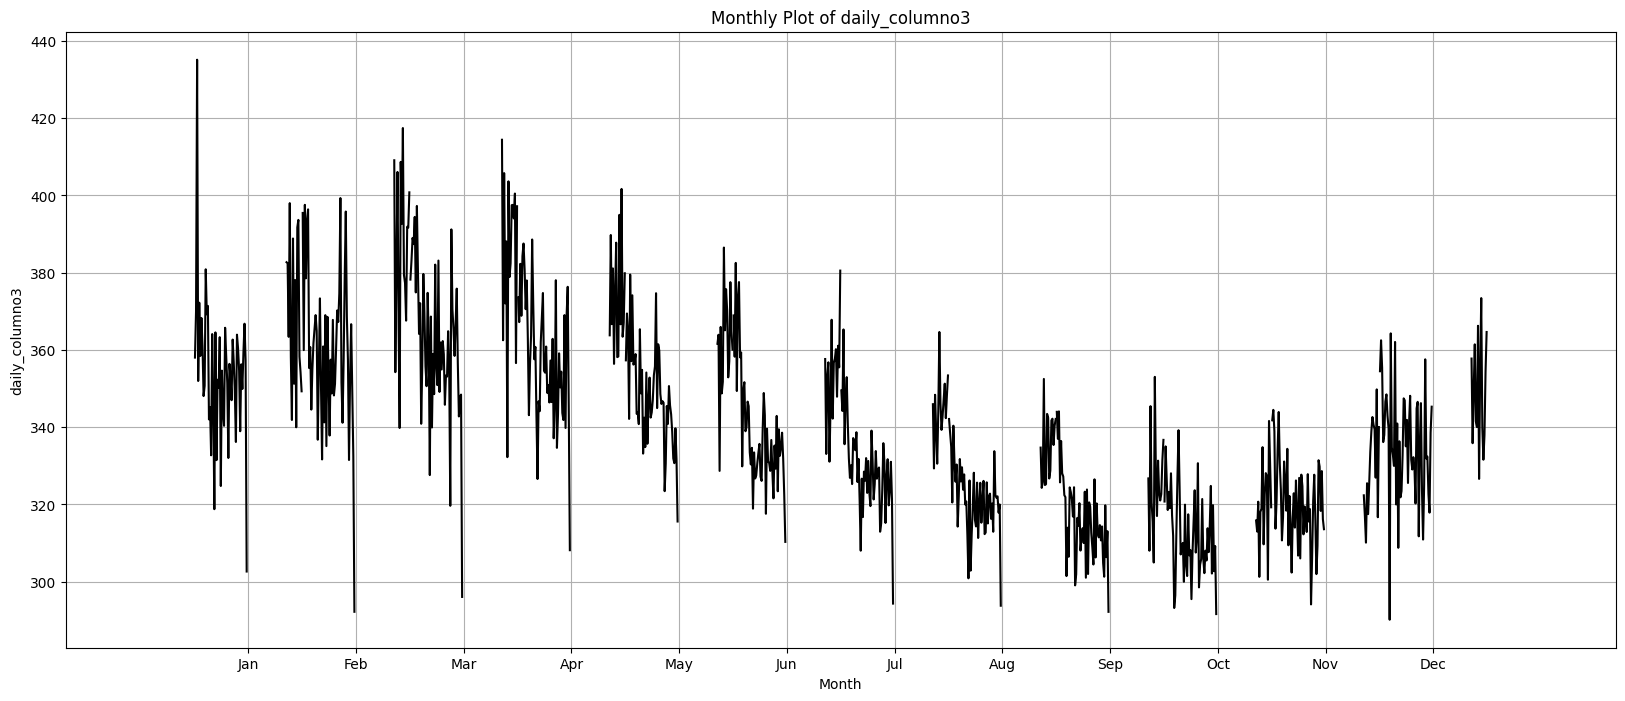

In [13]:
from statsmodels.graphics.tsaplots import month_plot

# Ensure 'daily_date' is in datetime format
df['daily_date'] = pd.to_datetime(df['daily_date'])

# Set 'daily_date' as the index
df = df.set_index('daily_date')

# Now resample and take the monthly mean
df_monthly_resampled = df['daily_columno3'].resample('M').mean()

# Plot using month_plot
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(20, 8))
month_plot(df_monthly_resampled, ylabel="Ozone", ax=ax)
plt.title("Monthly Plot of daily_columno3")
plt.xlabel("Month")
plt.ylabel('daily_columno3')
plt.grid()
plt.show()

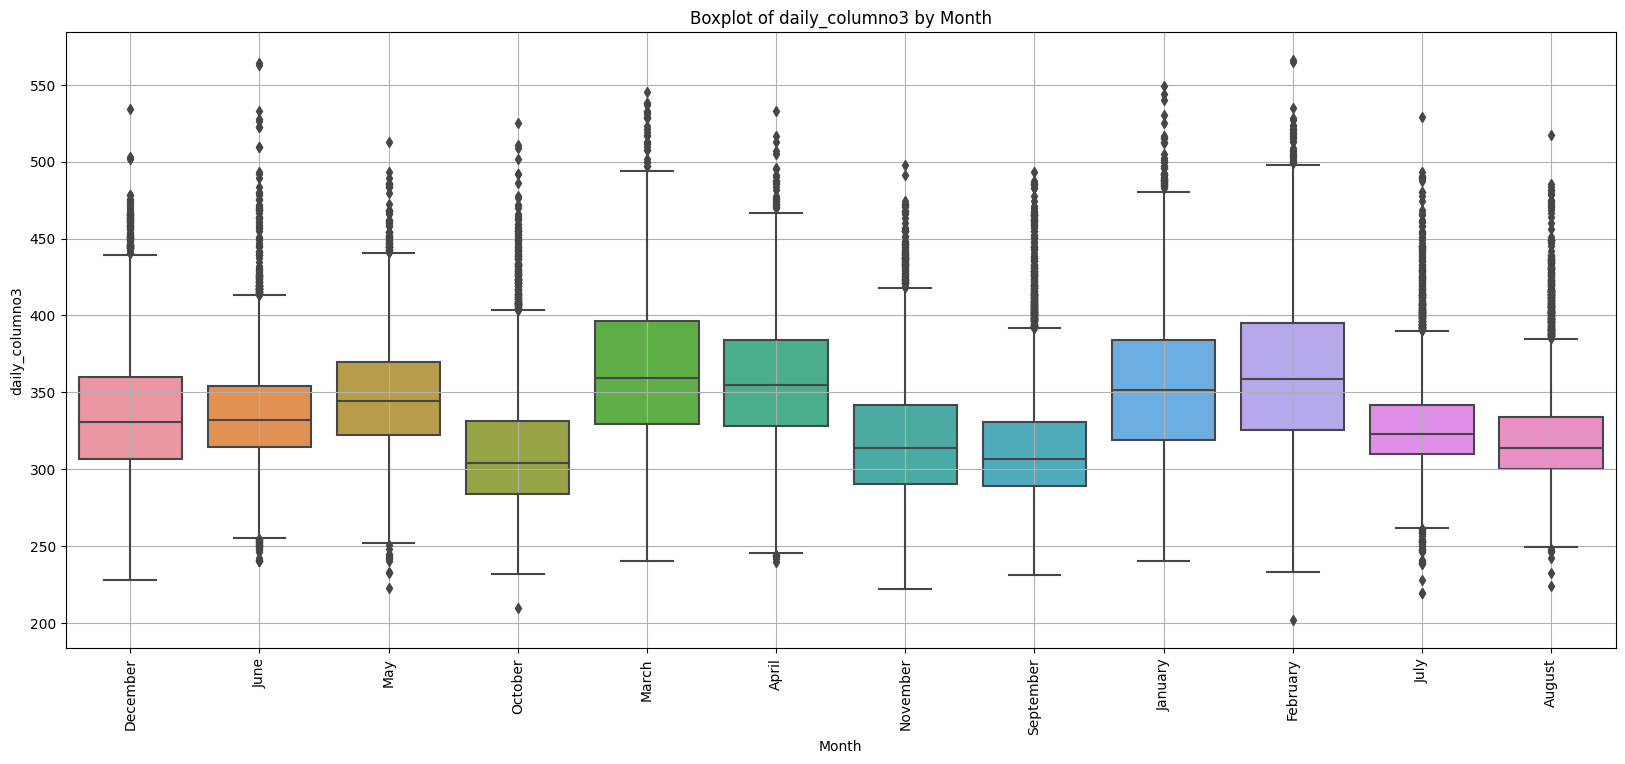

In [14]:
_ ,ax=plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.month_name(),y='daily_columno3',data=df,ax=ax)
plt.title("Boxplot of daily_columno3 by Month")
plt.xlabel("Month")
plt.ylabel('daily_columno3')
plt.xticks(rotation=90)
plt.grid()

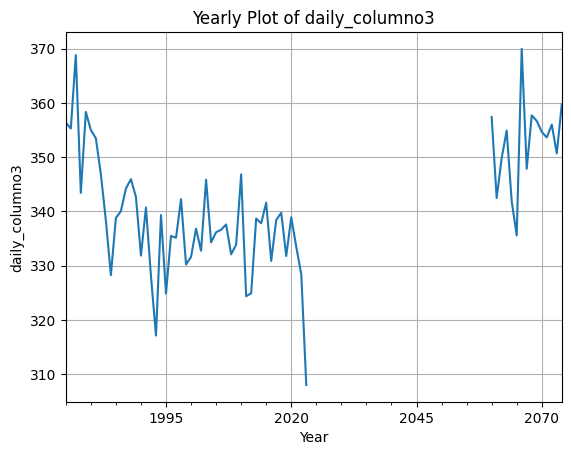

In [15]:
df_yearly_resampled = df['daily_columno3'].resample('A').mean()
df_yearly_resampled.plot()
plt.title("Yearly Plot of daily_columno3")
plt.xlabel("Year")
plt.ylabel('daily_columno3')
plt.grid()

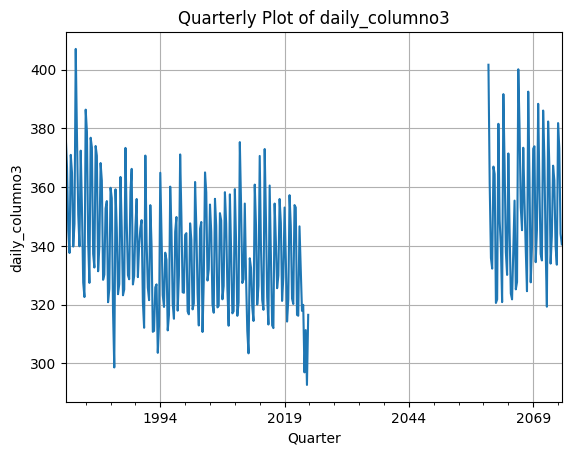

In [ ]:
df_quarterly_resampled = df['daily_stddevo3'].resample('Q').mean()
df_quarterly_resampled.plot()
plt.title("Quarterly Plot of daily_columno3")
plt.xlabel("Quarter")
plt.ylabel('daily_columno3')
plt.grid()

c:\Users\Abir Hossain\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 1200x600 with 0 Axes>

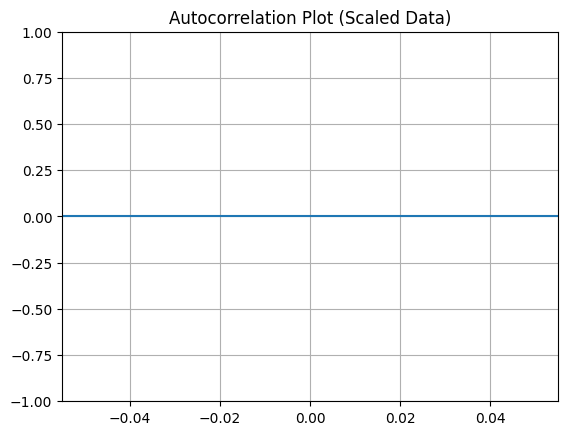

✅ Autocorrelation remains significant for all plotted lags.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# 1. Assume you already have your data
# Example:
# df = pd.read_csv('your_data.csv')

# 2. Scale the data
scaler = MinMaxScaler()
df['daily_stddevo3'] = scaler.fit_transform(df[['daily_stddevo3']])

# 3. Calculate ACF values on scaled data
acf_vals, confint = acf(df['daily_stddevo3'], nlags=30, alpha=0.05)

# 4. Calculate threshold from confidence interval
threshold = (confint[:,1] - confint[:,0]) / 2

# 5. Find first inconsistent lag
inconsistent_lag = None
for i, val in enumerate(acf_vals):
    if i == 0:  # Skip lag 0
        continue
    if abs(val) < threshold[i]:
        inconsistent_lag = i
        break

# 6. Plot ACF
plt.figure(figsize=(12,6))
plot_acf(df['daily_stddevo3'], lags=30, alpha=0.05)
plt.title('Autocorrelation Plot (Scaled Data)')
plt.grid()
plt.show()

# 7. Print result
if inconsistent_lag:
    print(f"👉 Autocorrelation becomes inconsistent after lag {inconsistent_lag}.")
else:
    print("✅ Autocorrelation remains significant for all plotted lags.")



In [57]:
df['daily_date'] = pd.to_datetime(df['daily_date'], format='%d-%m-%y')

# 2. Sort the dataframe by the full date (oldest to latest)
df = df.sort_values('daily_date', ascending=True).reset_index(drop=True)

df['lag1'] = df['daily_stddevo3'].shift(1)
df.dropna(inplace=True)
df.head()

,daily_date,daily_stddevo3,lag1
1,1984-05-21,0.039906,0.044601
2,1984-05-23,0.039906,0.039906
3,1984-05-25,0.051643,0.039906
4,1984-05-27,0.035211,0.051643
5,1984-06-05,0.042254,0.035211


Model Evaluation Metrics:

----- Linear Regression -----
RMSE: 0.073
MAE : 0.046
R2  : 0.359

----- Decision Tree -----
RMSE: 0.077
MAE : 0.046
R2  : 0.292

----- Random Forest -----
RMSE: 0.076
MAE : 0.046
R2  : 0.312

----- Gradient Boosting -----
RMSE: 0.075
MAE : 0.046
R2  : 0.337

----- Support Vector Regressor -----
RMSE: 0.077
MAE : 0.056
R2  : 0.294



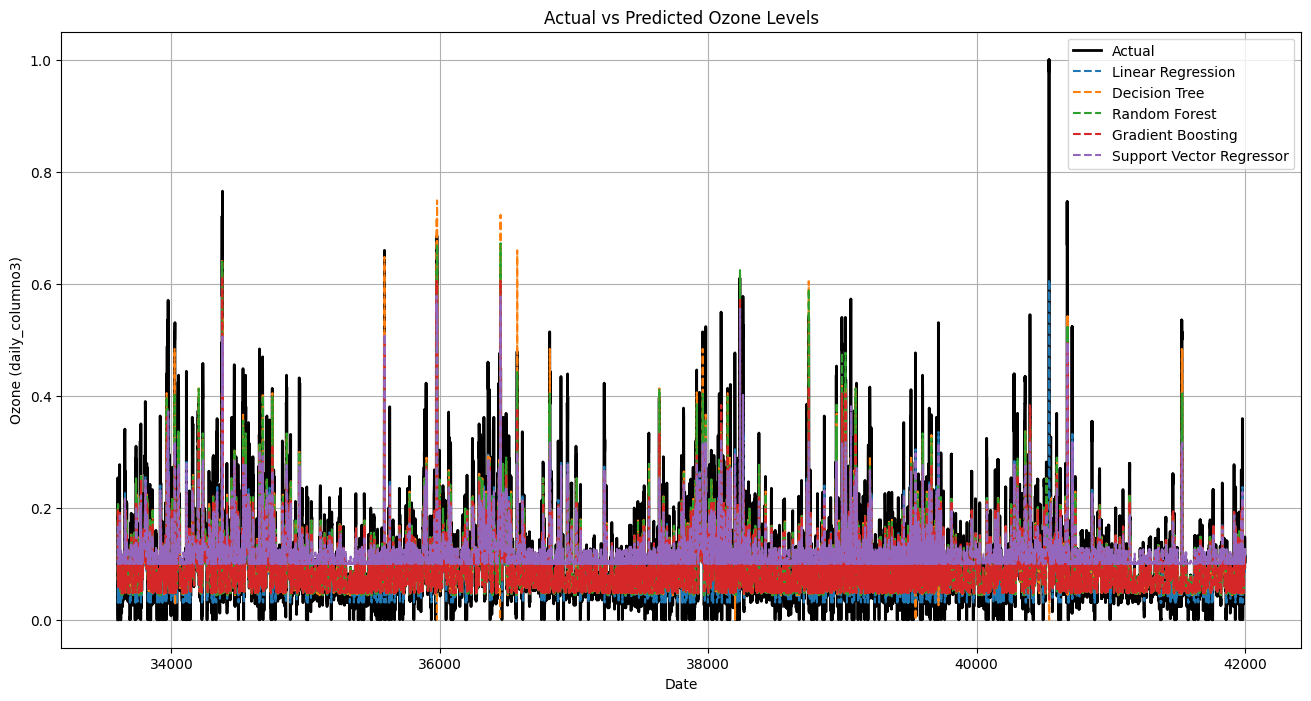

In [59]:

X = df[['lag1']]
y = df['daily_stddevo3']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# STEP 3: Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

# STEP 4: Train, Predict, and Evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results[name] = {
        'Model': model,
        'Predictions': preds,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# STEP 5: Print evaluation metrics
print("Model Evaluation Metrics:\n")
for name, res in results.items():
    print(f"----- {name} -----")
    print(f"RMSE: {res['RMSE']:.3f}")
    print(f"MAE : {res['MAE']:.3f}")
    print(f"R2  : {res['R2']:.3f}\n")

# STEP 6: Plot actual vs predicted
plt.figure(figsize=(16, 8))

# Actual data
plt.plot(y_test.index, y_test.values, label='Actual', color='black', linewidth=2)

# Predictions from each model
for name, res in results.items():
    plt.plot(y_test.index, res['Predictions'], label=name, linestyle='--')

plt.title('Actual vs Predicted Ozone Levels')
plt.xlabel('Date')
plt.ylabel('Ozone (daily_columno3)')
plt.legend()
plt.grid(True)
plt.show()
